In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

rng = np.random.default_rng()

In [2]:
## A singular simulation for playing the hat game H(n). Returns the final number
def game(n):
    hat = list(range(1,n+1))
    for i in range(n-1):
        pick1 = rng.integers(0,n-i)
        num1 = hat[pick1]
        hat.pop(pick1)
        pick2 = rng.integers(0,n-1-i)
        num2 = hat[pick2]
        hat.pop(pick2)
        new_num = abs(num1-num2)
        hat.append(new_num)
    return hat[0]

In [3]:
## simulation that returns an array "res" such that res[i] refers to the percentage of times
## the number i was obtained from the game
def simulation(game,n,sims):
    res = np.zeros(n+1)
    for i in range(sims):
        k = game(n)
        res[k] = res[k]+1
    return res/sims

In [4]:
## 10,000 simulations for the hat game H(n) for n in {3,4,5,6,7,8,9}
for i in range(3,10):
    res = simulation(game,i,10000)
    print(f"H({i}) is {res}")

H(3) is [0.6664 0.     0.3336 0.    ]
H(4) is [0.4371 0.     0.4503 0.     0.1126]
H(5) is [0.     0.6397 0.     0.3181 0.     0.0422]
H(6) is [0.     0.5988 0.     0.3127 0.     0.0885 0.    ]
H(7) is [0.3018 0.     0.4181 0.     0.2179 0.     0.0622 0.    ]
H(8) is [0.2951 0.     0.3843 0.     0.2175 0.     0.09   0.     0.0131]
H(9) is [0.     0.4684 0.     0.2964 0.     0.1615 0.     0.0648 0.     0.0089]


In [5]:
## Code to calculate the weighted average and weighted standard deviation of a simulation
## of a hat game H(n)
def avg_and_std(res,n):
    num = range(n+1)
    avg = np.average(num, weights=res)
    var = np.average((num-avg)**2, weights=res)
    return (avg, math.sqrt(var))

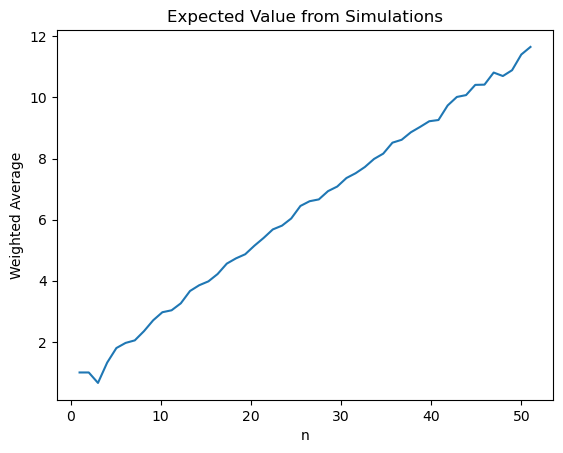

In [6]:
## 10,000 simulations for the hat game H(n) for n from 1 to 50 and immediately calculating
## their weighted averages and standard deviations then plotting the averages versus n
avg = np.zeros(50)
std = np.zeros(50)
for j in range(1,51):
    res = simulation(game,j,10000)
    avg[j-1] , std[j-1]  = avg_and_std(res,j)
    
x = np.linspace(1,51,50)
plt.plot(x,avg)
plt.title("Expected Value from Simulations")
plt.xlabel("n")
plt.ylabel("Weighted Average")
plt.show()

In [7]:
## Code to calculate linear regresion for the average of the first 50 hat games
from sklearn.linear_model import LinearRegression
x = x.reshape((-1, 1))
model = LinearRegression()
model.fit(x, avg)
r_sq = model.score(x, avg)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.9976597497335242
intercept: 0.6775852611764721
slope: [0.2156218]


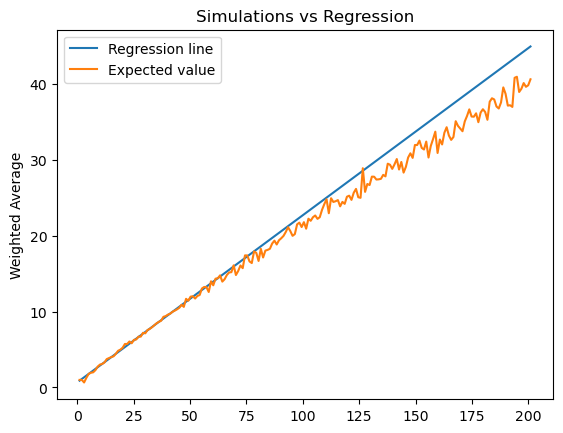

In [8]:
## test to check how well regression model works for values outside its input
avg = np.zeros(200)
std = np.zeros(200)
for j in range(1,201):
    res = simulation(game,j,1000)
    avg[j-1] , std[j-1]  = avg_and_std(res,j)
    
x = np.linspace(1,201,200)
y = 0.22*x+0.68
plt.plot(x,y,label='Regression line')
plt.plot(x,avg,label='Expected value')
plt.title("Simulations vs Regression")
plt.ylabel("Weighted Average")
plt.legend()
plt.show()

In [9]:
## code to graph the distribution of values for sims simulations of hat game H(n)
def graph(res,n,sims):
    num = range(n+1)
    fig, ax = plt.subplots()
    ax.bar(num, res)
    ax.set_title(f"Distribution of results using {sims} simulations for a hat conataining numbers from 1 to {n}")
    plt.ylabel("Probability of being selected")
    plt.xlabel("final number")
    plt.show()

In [ ]:
## Running 10,000 simulations for the original hat game H(2024)
res_2024 = simulation(game,2024,10000)
avg_2024, std_2024 = avg_and_std(res_2024,2024)
print("Average result for 10,000 simulations of H(2024) is",avg_2024)
print("This game had a standard deviation of",std_2024)
graph(res_2024,2024,10000)

In [11]:
## Function that fits a gamma distribution to some simulated game of H(n)
## The normal calculation of the parameters gave a curve that seemed half the size
## so I multiplied the resulting curve by 2
## I though this made sense since half the numbers are missing (i.e. the odds or evens)
## Perhaps for larger n, the hat game H(n) gets closer to following this distribution
## This model is obviously limited since gamma is a continuous distribution and we have discrete data
import scipy.stats as stats 
def fitting_gamma(res,n,avg,std,sims):
    k = ( avg / std ) ** 2
    theta = avg / k
    
    num = range(n+1)
    x = np.linspace(0,n+1,sims)
    y = stats.gamma.pdf(x, a=k, scale=theta)

    fig, ax = plt.subplots()
    ax.bar(num, res)
    ax.set_title(f"Distribution of results using {sims} simulations for a hat conataining numbers from 1 to {n}")
    plt.plot(x, 2*y,"y")
    plt.ylabel("Probability")
    plt.xlabel("final number")
    plt.xlim(0)
    plt.show()

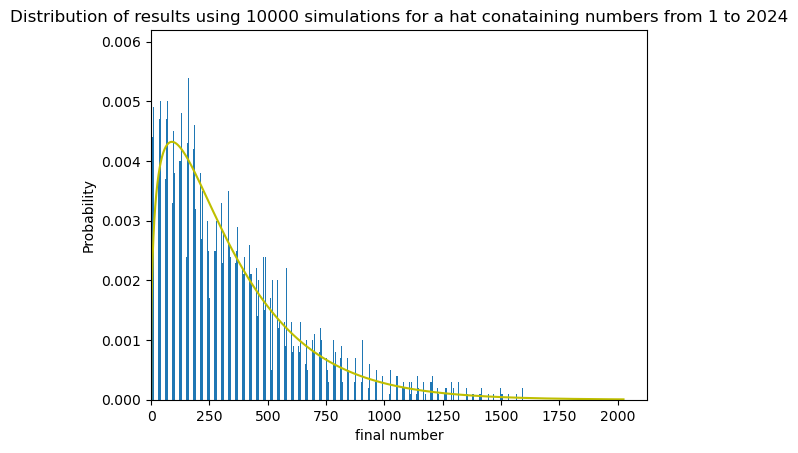

In [12]:
fitting_gamma(res_2024,2024,avg_2024,std_2024,10000)